<h1 style="font-size:3rem;color:rgb(0, 91, 94);text-align:center;">Project 2</h1>
<hr style=\"border-top: 1px solid rgb(0, 91, 94);\" />

<h2 style="color:rgb(0, 91, 94)">Background</h2>
<hr style=\"border-top: 1px solid rgb(0, 91, 94);\" />

The purpose of this project is to investigate the Wisconsin Breast Cancer (Diagnostic) dataset. This dataset is comprised of 569 instances of features computed from digitized images of a fine needle aspirate (FNA) of a breast mass. Each instance describes characteristics of the cell nuclei present in the image. More information can be found at https://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+(diagnostic).

Features include:
- radius (mean of distances from center to points on the perimeter)
- texture (standard deviation of gray-scale values)
- perimeter
- area
- smoothness (local variation in radius lengths)
- compactness (perimeter^2 / area - 1.0)
- concavity (severity of concave portions of the contour)
- concave points (number of concave portions of the contour)
- symmetry
- fractal dimension ("coastline approximation" - 1)

<h2 style="color:rgb(0, 91, 94)">Literature Review on Classifiers</h2>
<hr style=\"border-top: 1px solid rgb(0, 91, 94);\" />

While there are numerous classifiers which have been applied to Wisconsin Breast Cancer (Diagnostic) dataset in past research, the following three have been chosen to hightlight for the purposes of this project.

### Support Vector Machine

https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC

Research by Obaid et al. (2018) assessed the performance of Support Vector Machine (SVM) in the accurate classification of breast cancer when applied to the Wisconsin Breast Cancer (Diagnostic) dataset. Their findings indicated that SVM (when using "linear" kernel) has accuracy of 97.9% in the classification of breast cancer (Obaid et al, 2018).

Research by Agarap (2018) when assessing the performance of Support Vector Machine on the same dataset showed that SVM has accuracy of 96.09% in the classification of breast cancer (Agarap, 2018).

Research by Saygili (2018) when assessing the performance of Support Vector Machine (linear) on the same dataset showed that SVM has accuracy of 98.07% in the classification of breast cancer (Saygili, 2018).

### Random Forest

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

Research by Saygili (2018) assessed the performance of Random Forest in the accurate classification of breast cancer when applied to the Wisconsin Breast Cancer (Diagnostic) dataset. They found that Random Forest was 98.77% accurate in the classification of breast cancer (Saygili, 2018).

Research by Nguyen et al (2013) when assessing the performance of Random Forest on the same dataset showed that Random Forest has accuracy of 99.82% in the classification of breast cancer (Nguyen et al. 2013).

Research by Naji et al. (2021) when assessing the performance of Random Forest on the same dataset showed that Random Forest has accuracy of 96.5% in the classification of breast cancer (Naji et al. 2021).

### Multi-layer Perceptron

https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html

Research by Agarap (2018) assessed the performance of Multi-layer Perceptron (MLP) in the accurate classification of breast cancer when applied to the Wisconsin Breast Cancer (Diagnostic) dataset. Their findings indicated that MLP has accuracy of 99.04% in the classification of breast cancer (Agarap, 2018).

Research by Saygili (2018) assessed the performance of Multi-layer Perceptron (MLP) in the accurate classification of breast cancer on the same dataset. Their findings indicated that MLP has an accuracy of 98.41% in the classification of breast cancer (Saygili, 2018).

Research by Kathija, Nisha, and Sathik (2017) assessed the performance of Multi-layer Perceptron (MLP) in the accurate classification of breast cancer on the same dataset. Their findings indicated that MLP has an accuracy of 100% in the classification of breast cancer (Kathija, Nisha, and Sathik, 2017).

<h2 style="color:rgb(0, 91, 94)">Statistical Analysis</h2>
<hr style=\"border-top: 1px solid rgb(0, 91, 94);\" />

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

attributes = ["id", "diagnosis", "radius_mean", "texture_mean", "perimeter_mean", "area_mean ", "smoothness_mean", "compactness_mean", "concavity_mean", "concave_points_mean", "symmetry_mean", "fractal_dimension_mean", "radius_se", "texture_se", "perimeter_se", "area_se", "smoothness_se", "compactness_se", "concavity_se", "concave_points_se", "symmetry_se", "fractal_dimension_se", "radius_worst", "texture_worst", "perimeter_worst", "area_worst", "smoothness_worst", "compactness_worst", "concavity_worst", "concave_points_worst", "symmetry_worst", "fractal_dimension_worst"]
data = pd.read_csv("Data/breast-cancer-wisconsin.data", header=None, names=attributes)

Class distribution: 357 benign, 212 malignant


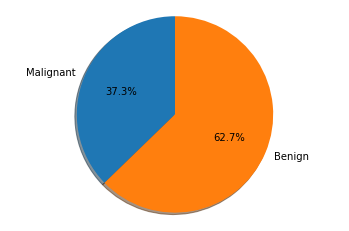

In [7]:
pie_labels = ["Malignant", "Benign"]
print("Class distribution: 357 benign, 212 malignant") # (from dataset description)
sizes = [212, 357]

# https://matplotlib.org/stable/gallery/pie_and_polar_charts/pie_features.html
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=pie_labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.show()

Below are a series of bar charts displaying the mean, standard error, and worst values of the 10 attributes for both malignant (M) and benign (B) groups


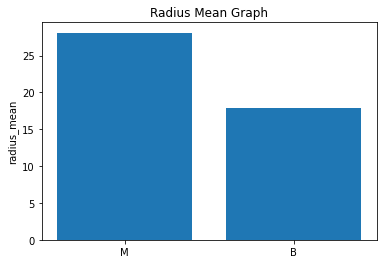

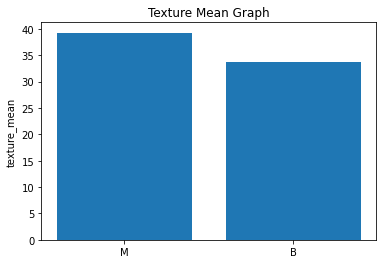

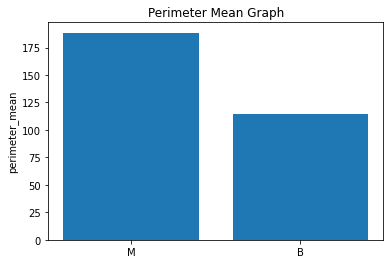

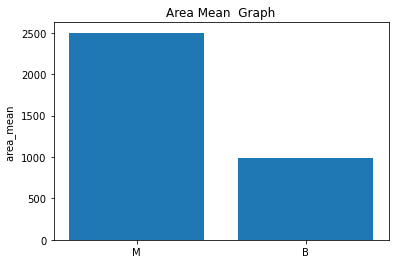

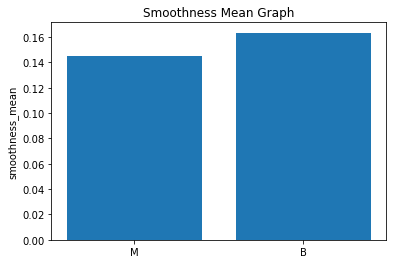

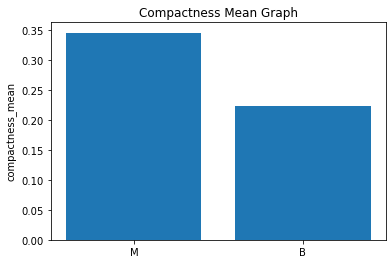

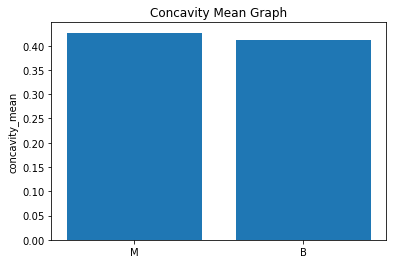

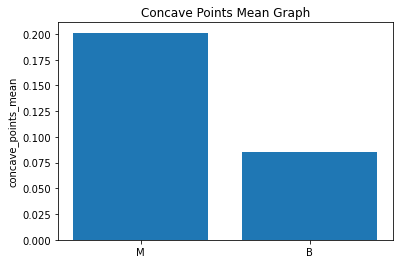

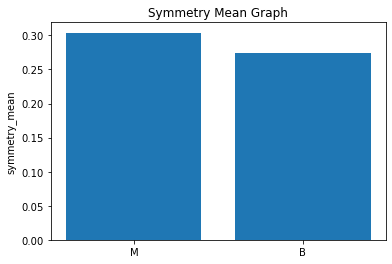

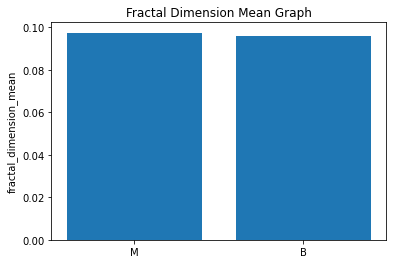

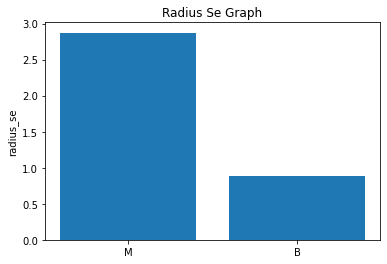

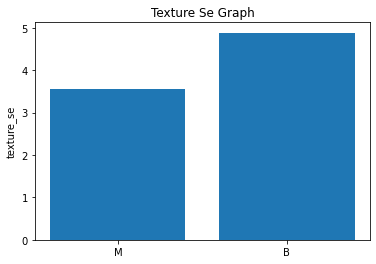

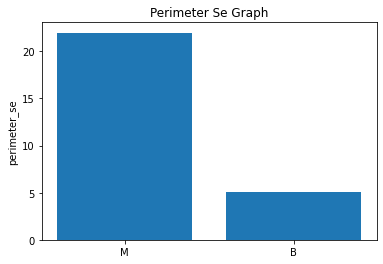

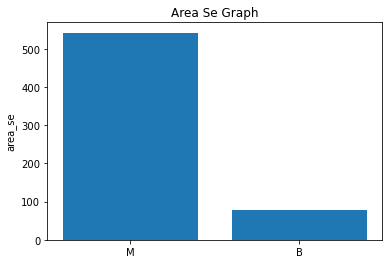

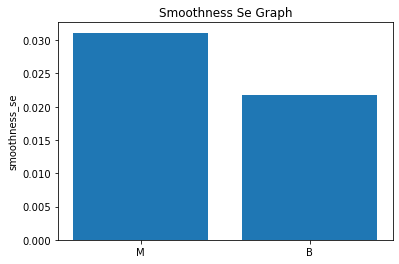

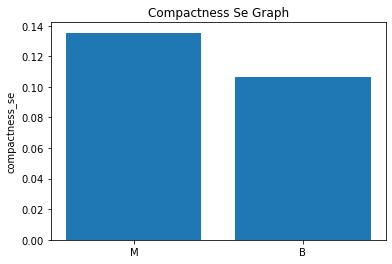

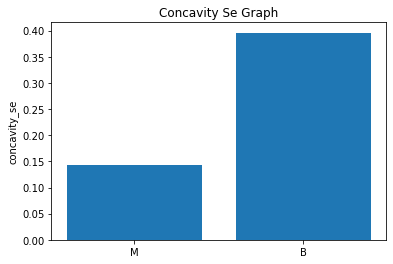

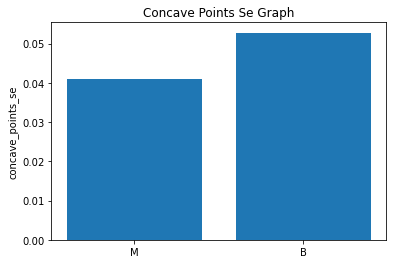

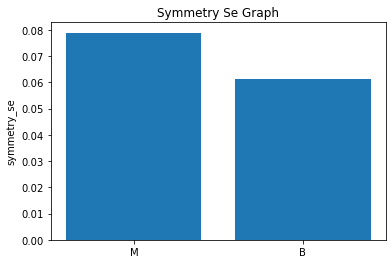

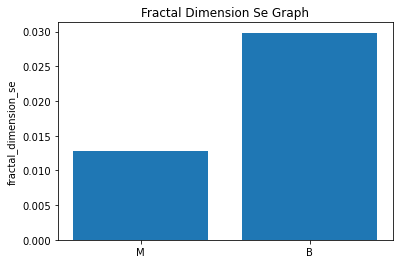

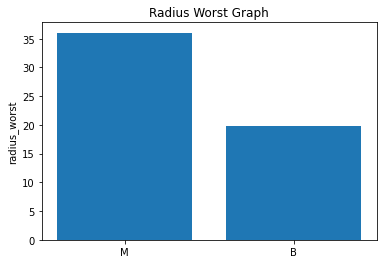

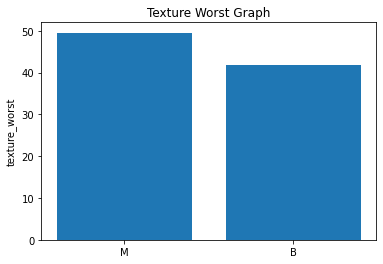

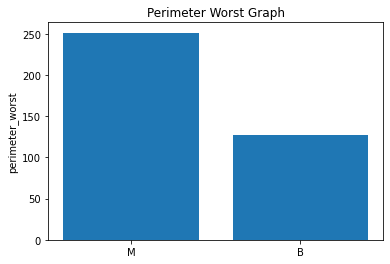

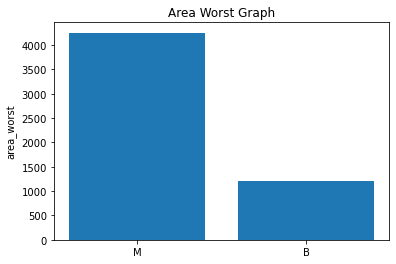

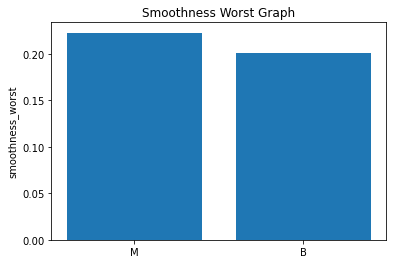

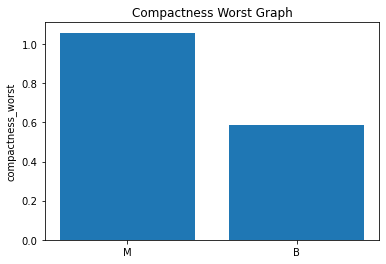

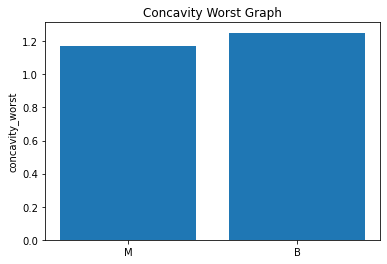

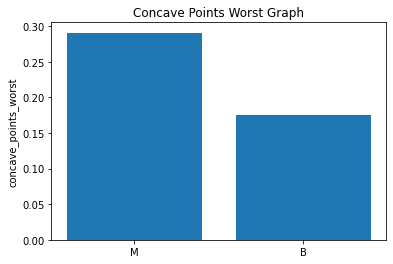

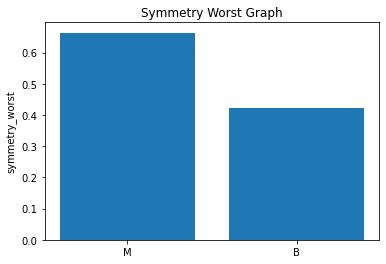

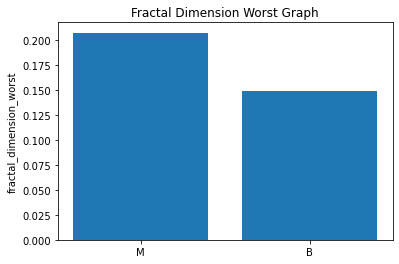

In [8]:
print("Below are a series of bar charts displaying the mean, standard error, and worst values of the 10 attributes for both malignant (M) and benign (B) groups")

for i in attributes:
    if i == "id" or i == "diagnosis":
        continue
    plt.bar(data["diagnosis"], data[i])
    
    plt.title(f"{i.replace('_', ' ').title()} Graph")
    plt.ylabel(i)
    plt.show()

<h2 style="color:rgb(0, 91, 94)">Training Classifiers</h2>
<hr style=\"border-top: 1px solid rgb(0, 91, 94);\" />

In [3]:
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [4]:
# import SVC
from sklearn.svm import SVC

# remove "id" and "diagnosis" colums from input data
x = data.drop(["id", "diagnosis"], axis = 1)
# set output data to "disgnosis" column
y = data["diagnosis"]

# define the training and test data using sklearn train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=0)

# the following parameters were chosen to attempt to replicate the findings of Obaid et al. (2018) when investigating with SVC linear kernel
svc = SVC(kernel="linear", C=1, gamma="auto", decision_function_shape="ovo")
# train the model
svc.fit(x_train, y_train) 
# use model to make predictions
prediction_1 = svc.predict(x_test)

# print the accuracy percentage using sklearn accuracy_score
print("SVM predicts at {0:2g}% accuracy.".format(accuracy_score(y_test, prediction_1)*100))


# https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score

SVM predicts at 95.7447% accuracy.


In [5]:
# import Random Forest
from sklearn.ensemble import RandomForestClassifier

x = data.drop(["id", "diagnosis"], axis = 1)
y = data["diagnosis"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=0)

# the following parameters were chosen to attempt to replicate the findings of Nguyen et al. (2013) when investigating with Random Forest.
rf = RandomForestClassifier(n_estimators=25, max_features=15, random_state=0)
rf.fit(x_train, y_train)
prediction_2 = rf.predict(x_test)

print("Random Forest predicts at {0:2g}% accuracy.".format(accuracy_score(y_test, prediction_2)*100))

# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score

Random Forest predicts at 95.2128% accuracy.


In [16]:
# import Multi-layer Perceptron
from sklearn.neural_network import MLPClassifier

x = data.drop(["id", "diagnosis"], axis = 1)
y = data["diagnosis"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=0)


mlp = MLPClassifier(random_state=0)
mlp.fit(x_train, y_train)
prediction_3 = mlp.predict(x_test)

print("Multi-layer Perceptron predicts at {0:2g}% accuracy.".format(accuracy_score(y_test, prediction_3)*100))

# https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score

Multi-layer Perceptron predicts at 92.0213% accuracy.


<h2 style="color:rgb(0, 91, 94)">References</h2>
<hr style=\"border-top: 1px solid rgb(0, 91, 94);\" />

Obaid, O. I., Mohammed, M. A., Ghani, M. K. A., Mostafa, A., & Taha, F. (2018). Evaluating the performance of machine learning techniques in the classification of Wisconsin Breast Cancer. International Journal of Engineering & Technology, 7(4.36), 160-166.

Saygili, A. (2018). Classification and diagnostic prediction of breast cancers via different classifiers. International Scientific and Vocational Studies Journal, 2(2), 48-56.

Nguyen, C., Wang, Y., & Nguyen, H. N. (2013). Random forest classifier combined with feature selection for breast cancer diagnosis and prognostic.

Agarap, A. F. M. (2018, February). On breast cancer detection: an application of machine learning algorithms on the wisconsin diagnostic dataset. In Proceedings of the 2nd international conference on machine learning and soft computing (pp. 5-9).

Naji, M. A., El Filali, S., Aarika, K., Benlahmar, E. H., Abdelouhahid, R. A., & Debauche, O. (2021). Machine learning algorithms for breast cancer prediction and diagnosis. Procedia Computer Science, 191, 487-492.

Kathija, A., Nisha, S. S., & Sathik, M. M. (2017). Breast cancer data classification using neural network approach of MLP algorithm. International journal of trend in research and development, 4(3), 275-279.